<a href="https://colab.research.google.com/github/winterForestStump/econometrics/blob/main/assignment_1/a1_pr_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1. The Classical Linear Regression Model. Problem 7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/winterForestStump/econometrics/refs/heads/main/assignment_1/consumption.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obs          200 non-null    int64  
 1   year         200 non-null    int64  
 2   quarter      200 non-null    int64  
 3   income       200 non-null    float64
 4   consumption  200 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.9 KB


#### (a) We want to estimate the marginal propensity to consume on an aggregate level. The simplest way to do so would be to model consumption as a linear function of a constant and disposable income. Starting with data in year 1953, estimate this simple model by OLS. Write down the assumed model and the regression output

Model:

consumption = ${β_0}$ + ${β_1}$ * income + ${ϵ}$

where ${β_1}$ - marginal propensity to consume (MPC)

In [3]:
# Filter data from 1953 onwards
df_1953 = data.loc[data['year'] > 1952].copy()

# Define X and y
X = df_1953[['income']]
y = df_1953['consumption']

# Fit and summarize OLS model
model = sm.OLS(y, sm.add_constant(X)).fit() # sm.add_constant() returns the original values with a constant (column of ones) as the first column with the name 'const'
print(f'The regression output:\n\n {model.summary()}')

The regression output:

                             OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.085e+04
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          4.23e-183
Time:                        10:08:19   Log-Likelihood:                -1844.2
No. Observations:                 176   AIC:                             3692.
Df Residuals:                     174   BIC:                             3699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7550.2970   153

####(b) Plot the residuals from (a) against time. Does the model seem to be well specified? Why (not)?

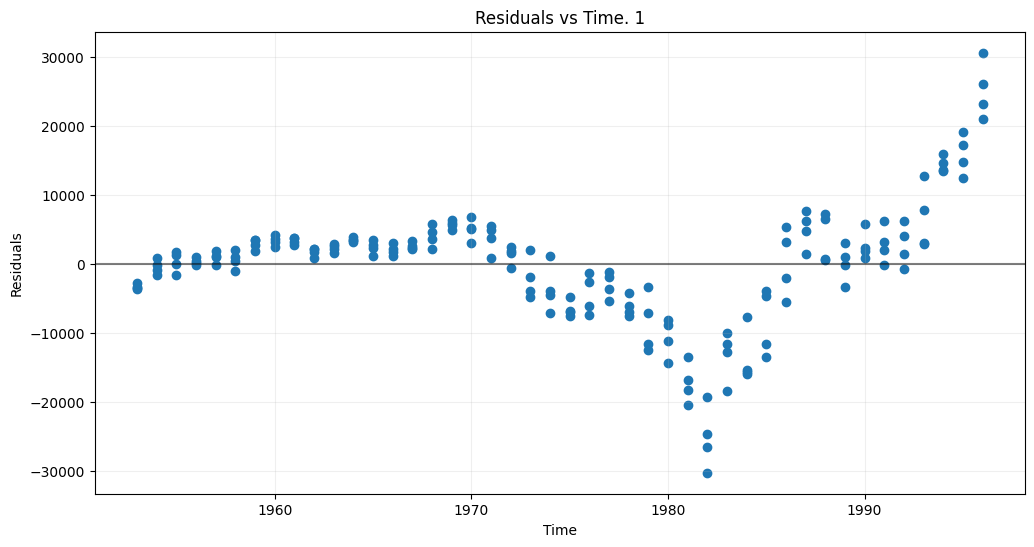

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(df_1953['year'],model.resid)
plt.axhline(y=0, color='black', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Time. 1')
plt.grid(True, alpha=0.2)

The model does not seem to be well specified. It is misspecified because the residuals exhibit clear patterns over time, violating the assumption of independent and identically distributed errors or the assumption of uncorrelated errors, $\text{E}[\epsilon_i \epsilon_j] = 0$ for $i \neq j$, in a SLRM.

Ideally, residuals should be randomly scattered around the zero line, showing no trend or pattern over time. In the plot, the residuals are clearly not random: there are clear upward and downward trends.

The smooth pattern of the residuals indicates positive autocorrelation, where a positive residual tends to be followed by another positive residual, and a negative by a negative. This suggests that the error in one period is related to the error in the previous period.

The variance of the residuals is increasing significantly over time, espessially in the later periods, where the points are much more spread out. This suggests that the error term does not have a constant variance ($\text{Var}[\epsilon_i] = \sigma^2$), which is the assumption of homoskedasticity. This pattern suggests heteroskedasticity.

####(c) Using the data on disposable income, simulate consumption over time. The model should take the same form as in (a). For the parameters, take the estimates from (a). For the error ε, assume that ε ∼ N (0, σˆ2), where σˆ2 is the estimated error variance from (a). Write down the model assumed for simulation. How do you ensure that your simulation is reproducible?

In [5]:
beta_0_hat = model.params['const']
beta_1_hat = model.params['income']
sigma_hat = np.sqrt(np.sum(model.resid**2) / (len(df_1953) - model.df_model - 1))

print(f'β_0 (intercept): {beta_0_hat}')
print(f'β_1 (MCP): {beta_1_hat}')
print(f'σˆ2 (standart error): {sigma_hat}')

β_0 (intercept): 7550.296984587267
β_1 (MCP): 0.8567227541869309
σˆ2 (standart error): 8651.271068253824


In [6]:
# Set ranom seed for reproducibility: same randdom errors are generated each time the code runs
np.random.seed(42)

# Generate simulated errors, assuming that ε ∼ N (0, σˆ2 ), where σˆ2 is the estimated error variance from (a)
new_errors = np.random.normal(0, sigma_hat, len(df_1953))

# Simulate consumption
sim_consumption = beta_0_hat + beta_1_hat * df_1953['income'] + new_errors

####(d) Forget the parameters from (c), and use the simulated consumption series to estimate the same model as in (a). Write down the regression output. Do the parameter estimates differ from those in (a)? Why (not)?

In [7]:
df_1953_sim = df_1953.copy()
df_1953_sim['sim_consumption'] = round(sim_consumption,1)

X_sim = df_1953_sim[['income']]
y_sim = df_1953_sim['sim_consumption']

# Fit and summarize OLS model
model_sim = sm.OLS(y_sim, sm.add_constant(X_sim)).fit() # sm.add_constant() returns the original values with a constant (column of ones) as the first column with the name 'const'
print(f'The regression output:\n\n {model_sim.summary()}')

The regression output:

                             OLS Regression Results                            
Dep. Variable:        sim_consumption   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.444e+04
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          4.84e-189
Time:                        10:08:20   Log-Likelihood:                -1831.6
No. Observations:                 176   AIC:                             3667.
Df Residuals:                     174   BIC:                             3673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5712.6539   142

In [8]:
# Compare parameter estimates
results = pd.DataFrame()
results['original'] = model.params
results['simulated'] = model_sim.params
results['difference'] = model_sim.params - model.params
results['% diff'] = results['difference'] / results['original']
results

,original,simulated,difference,% diff
const,7550.296985,5712.653890,-1837.643095,-0.243387
income,0.856723,0.862924,0.006202,0.007239


Regression output with simulated data:

* Intercept: 5712.66 (vs 7550.30 previously)
* MPC: 0.8629 (vs 0.8567 previously)

Parameter estimates differ:

* Intercept difference -1837.64 (-24%)
* MPC difference -0.0062 (0.7%)

The estimates differ because the simulated data was generated by adding a new, purely random error term that satisfies the CLRM assumptions ($\epsilon_{\text{sim}} \sim N(0, \hat{\sigma}^2)$ and is i.i.d.) to the original fitted values. The residuals from the original regression (a) were not random, they showed autocorrelation.

####(e) Plot the residuals from (d) against time. Comment on the difference between this plot and the plot in (b).

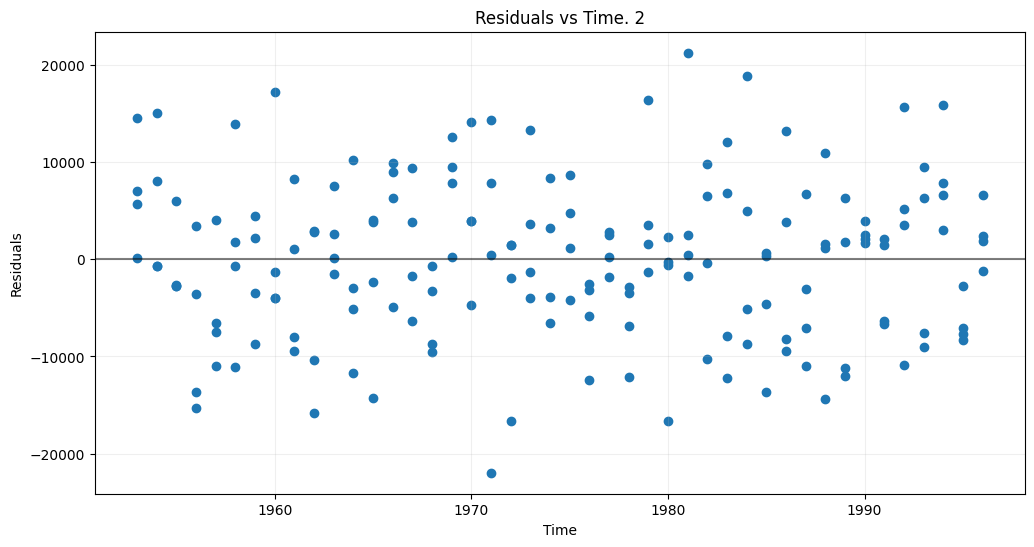

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(df_1953_sim['year'],model_sim.resid)
plt.axhline(y=0, color='black', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals vs Time. 2')
plt.grid(True, alpha=0.2)

The new plot shows a random scatter around the zero line. There is no visible pattern, trend, or cycle. The residuals appear serially uncorrelated.

Also the new plot has roughly constant variance (homoskedasticity). The spread of the points is relatively consistent across the entire time period.

The plot supports the assumption that the simulated errors are independent and identically distributed (i.i.d.)